In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Set the size of plot size
plt.rcParams["figure.figsize"] = (5,5)

In [30]:
i_small_fcat = np.loadtxt('/Users/rliu/Downloads/test/i_small_src_new.fcat')

In [31]:
i_small_ra = i_small_fcat[:,91]
i_small_dec = i_small_fcat[:,92]

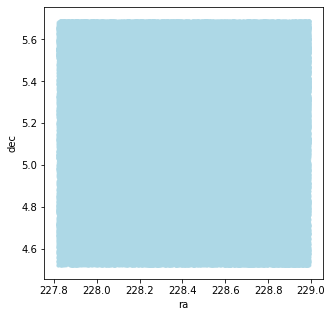

In [39]:
plt.scatter(i_small_ra, i_small_dec, color='lightblue', alpha=0.5, marker='.')
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

In [10]:
# Corners in src file of i_coadd_small
np.degrees((3.9762, 0.0993782))

array([227.8194785 ,   5.69395144])

In [11]:
np.degrees((3.9966, 0.0993782))

array([228.9883124 ,   5.69395144])

In [12]:
np.degrees((3.9762, 0.078958))

array([227.8194785 ,   4.52396016])

In [13]:
np.degrees((3.9966, 0.078958))

array([228.9883124 ,   4.52396016])

In [24]:
# Corners in src file of i_coadd_small
src_small_ra = np.array([227.8194785, 228.9883124, 227.8194785, 228.9883124])
src_small_dec = np.array([5.69395144, 5.69395144, 4.52396016, 4.52396016])

# Corners in original image of i_coadd_small
img_small_ra = np.array([228.32507, 227.15093, 228.32382, 227.15207])
img_small_dec = np.array([6.32532, 6.325379, 5.158333, 5.15838])

# Corners in original image of i_coadd
img_large_ra = np.array([228.87777, 226.53858, 228.90181, 226.52876])
img_large_dec = np.array([6.7652989, 6.7582015, 4.6052509, 4.6017225])

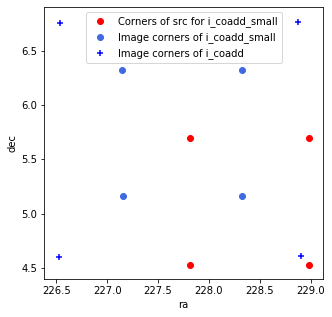

In [36]:
plt.scatter(src_small_ra, src_small_dec, label='Corners of src for i_coadd_small', color='red', marker='o')
plt.scatter(img_small_ra, img_small_dec, label='Image corners of i_coadd_small', color='royalblue', marker='o')
plt.scatter(img_large_ra, img_large_dec, label='Image corners of i_coadd', color='blue', marker='+')
plt.xlabel('ra')
plt.ylabel('dec')
plt.legend()
plt.show()

### Issue:
There is a significant WCS shift in the original image and the output src catalog for i_coadd_small.

### Possible reason:
DM/obs_file is using WCS header and 'physical x & y', which are corresponding to the frame of the large whole image. 
i_coadd_small is generated by imcopy that preserves both 'physical x y' and 'image x y'. In this case, we want the small image has the same value for both.

### Solution:
1. Run DM/obs_file on the large image.
2. Modify the header of i_coadd_small to make 'physical x y' = 'image x y' 
	(set LTV1=0, LTV2=0. Updated image saved as i_coadd_lensing_small_new.fits)
